# **Import library**

In [10]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install pdfplumber
!pip install PyPDF2
!pip install python-Levenshtein
!pip install nltk
!pip install gradio nltk textdistance
!pip install fuzzywuzzy
!pip install metaphone
!pip install pygtrie
!pip install faiss-cpu
!pip install --upgrade torch torchvision torchaudio
!pip install language_tool_python
!pip install gradio nltk language-tool-python
!pip install pyperclip

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 960.0 kB/s eta 0:00:14
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.6/12.8 MB 3.9 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 10.7 MB/s eta 0:00:02
     ------ --------------------------------- 2.1/12.8 MB 9.4 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 13.6 MB/s eta 0:00:01
     ----------- ---------------------------- 3.8/12.8 MB 12.2 MB/s eta 0:00:01
     ------------------ --------------------- 5.9/12.8 MB 16.4 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.8 MB 16.2 MB/s eta 0:00:01
     ----------------------- ---------------- 7.5/12.8 MB 16.6 MB/s eta 0:00:01
     ------------------------- -------------- 8.2/12.8 MB 17.5 MB/s eta 0:00:01
     ------------------------------- ------- 10.2/1

In [11]:
import re
import numpy as np
import joblib
import spacy
import pdfplumber
import PyPDF2
import gradio as gr
import nltk
import textdistance
import pandas as pd
import sys
import tkinter as tk
import pyperclip
import requests
import os
import random
import faiss

from tkinter import messagebox, filedialog
from typing import List, Tuple, Dict
from collections import Counter,defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, ngrams
from nltk.corpus import words, stopwords
from IPython.display import display
from textdistance import levenshtein
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from textdistance import levenshtein as edit_distance
from nltk.metrics import edit_distance
from fuzzywuzzy import fuzz
from metaphone import doublemetaphone
from rapidfuzz import fuzz
from transformers import pipeline
from pygtrie import Trie

ModuleNotFoundError: No module named 'transformers'

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download("words")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#**EDA inspecting dataset**

In [ ]:
# Load the text file
file_path = "dataset_text.txt"

with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.readlines()

# Convert text data to a single string for analysis
text_string = " ".join(text_data)


In [ ]:
# Word Count
word_list = text_string.split()
word_count = len(word_list)

print(f"Total Words: {word_count}")


Total Words: 2834087


In [ ]:
# Sentence Count (Approximate based on periods)
sentence_count = text_string.count(".")

print(f"Total Sentences: {sentence_count}")


Total Sentences: 358023


In [ ]:
# Character Count
char_count = len(text_string)

print(f"Total Characters: {char_count}")


Total Characters: 20135881


In [ ]:
from collections import Counter

# Find most common words
common_words = Counter(word_list).most_common(20)

print("Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")


Most Common Words:
the: 96590
and: 77133
of: 69608
to: 62690
a: 44180
.: 37693
in: 37284
that: 27589
is: 27519
for: 19012
are: 18331
or: 15362
The: 14688
be: 14442
as: 13729
on: 12564
with: 11833
you: 11536
an: 11314
by: 9932


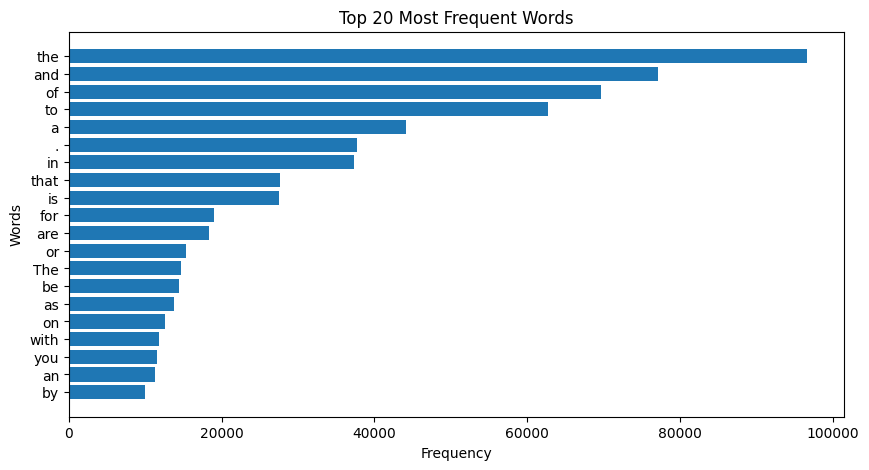

In [ ]:
import matplotlib.pyplot as plt

# Visualizing Word Frequency
words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
plt.barh(words[::-1], counts[::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words")
plt.show()


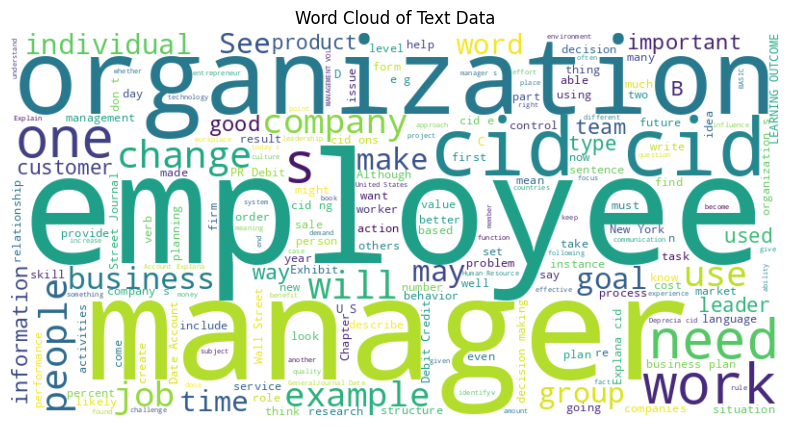

In [ ]:
from wordcloud import WordCloud

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_string)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Text Data")
plt.show()


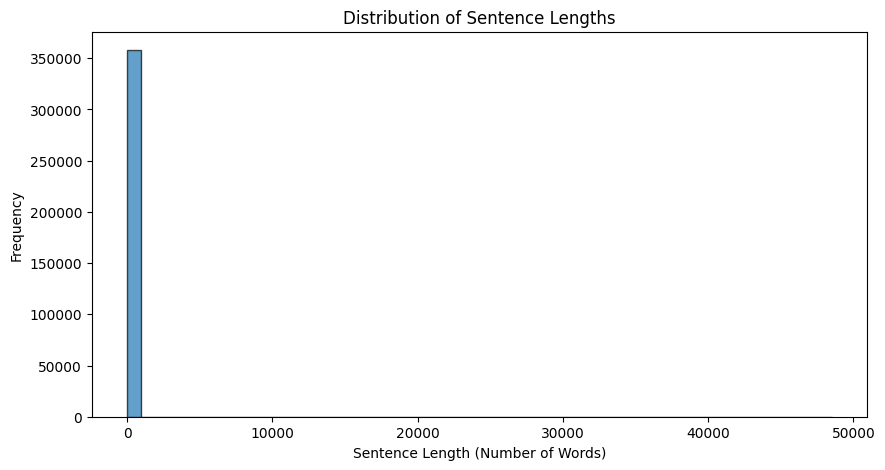

In [ ]:
# Sentence Length Distribution
sentence_lengths = [len(sentence.split()) for sentence in text_string.split(".")]

plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()


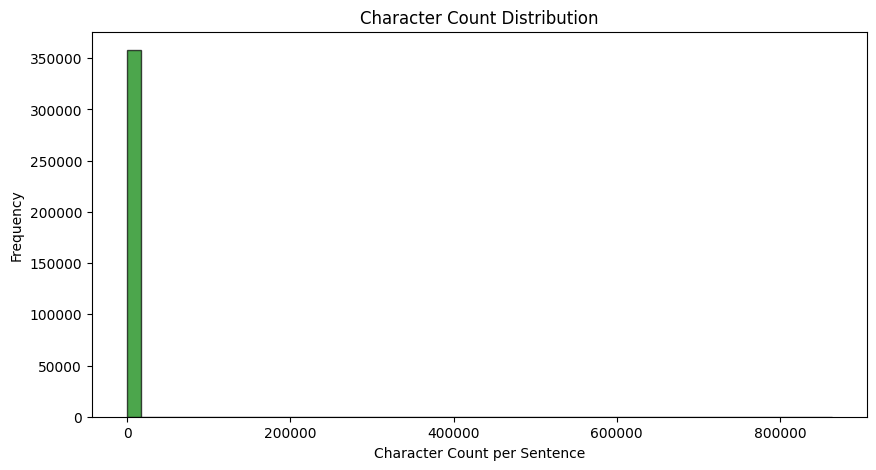

In [ ]:
# Character Count Distribution
char_counts = [len(sentence) for sentence in text_string.split(".")]

plt.figure(figsize=(10, 5))
plt.hist(char_counts, bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel("Character Count per Sentence")
plt.ylabel("Frequency")
plt.title("Character Count Distribution")
plt.show()


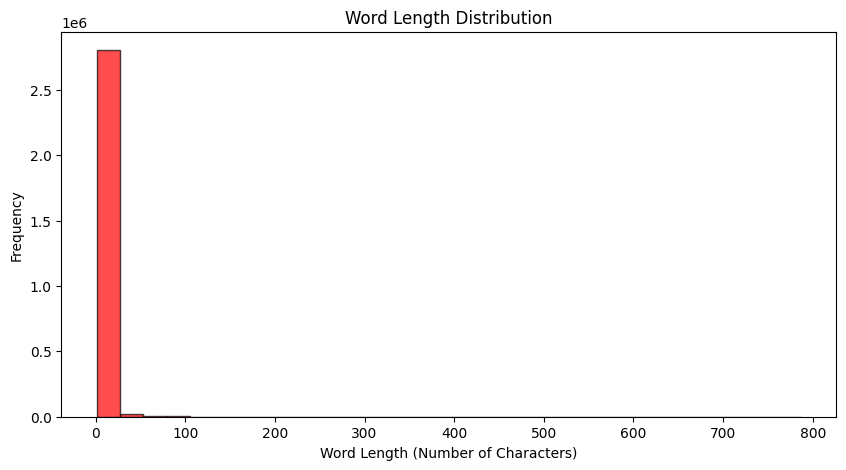

In [ ]:
# Word Length Distribution
word_lengths = [len(word) for word in word_list]

plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=30, edgecolor='black', alpha=0.7, color='red')
plt.xlabel("Word Length (Number of Characters)")
plt.ylabel("Frequency")
plt.title("Word Length Distribution")
plt.show()


# **preprocessing**

In [ ]:
word_list = words.words()
english_vocab = set(word_list)
# Function to clean text
def preprocess_text(text: str) -> str:
    word_in_text = []
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters (except spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    words_in_text = text.lower().split()  # Convert to lowercase & split into words

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Keep only valid English words (from NLTK's dictionary)
    cleaned_tokens = [word for word in tokens if word in english_vocab]
    cleaned_tokens = sorted(set(cleaned_tokens))
    return "\n".join(cleaned_tokens)  # Format each word on a new line


In [ ]:
path = "/content/dataset_text.txt"

In [ ]:
# Read dataset
with open("/content/dataset_text.txt", "r", encoding="utf-8") as file:
    raw_text = file.read()

# Process text
cleaned_text = preprocess_text(raw_text)


# Save to preprocessed dataset
with open("/content/preprocessed_dataset.txt", "w", encoding="utf-8") as file:
    file.write(cleaned_text)

print("Preprocessed dataset saved successfully.")

Preprocessed dataset saved successfully.


In [ ]:
preprocessed_dataset = "/content/preprocessed_dataset.txt"

In [ ]:
# Load the text file and count the number of words
file_path = "/content/dataset_text.txt"

# Read the file content
with open(file_path, "r", encoding="utf-8") as file:
    text_content = file.read()
word_count = len(text_content.split())


with open(preprocessed_dataset, "r", encoding="utf-8") as file:
    tokens = file.read().split()
# Count total words and unique words
total_words = len(tokens)
unique_words = len(set(tokens))

print(f"Total words: {word_count}")
print(f"Unique words: {unique_words}")

Total words: 2834087
Unique words: 12466


#**EDA after preprocessing**

In [ ]:
# Load the text file
file_path = "/content/preprocessed_dataset.txt"

with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.readlines()

# Convert text data to a single string for analysis
text_string = " ".join(text_data)


In [ ]:
# Word Count
word_list = text_string.split()
word_count = len(word_list)

print(f"Total Words: {word_count}")


Total Words: 12466


In [ ]:
# Unique Word Count
unique_words = set(word_list)
unique_word_count = len(unique_words)

print(f"Unique Words: {unique_word_count}")


Unique Words: 12466


In [ ]:
from collections import Counter

# Find most common words
common_words = Counter(word_list).most_common(20)

print("Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")


Most Common Words:
a: 1
aa: 1
abandon: 1
abandoned: 1
abb: 1
abbey: 1
abbreviate: 1
abbreviation: 1
abbreviatory: 1
aberration: 1
abide: 1
ability: 1
ablative: 1
ablaze: 1
able: 1
ably: 1
abnormal: 1
aboard: 1
abolish: 1
abolition: 1


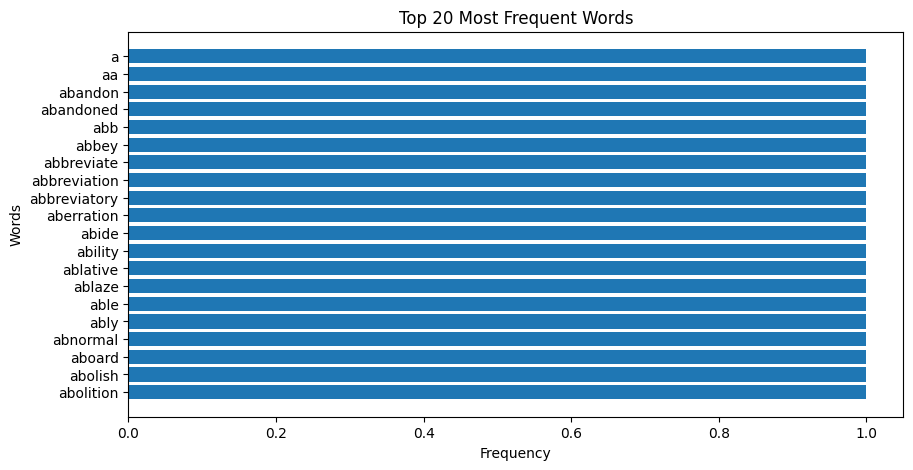

In [ ]:
import matplotlib.pyplot as plt

# Visualizing Word Frequency
words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
plt.barh(words[::-1], counts[::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words")
plt.show()


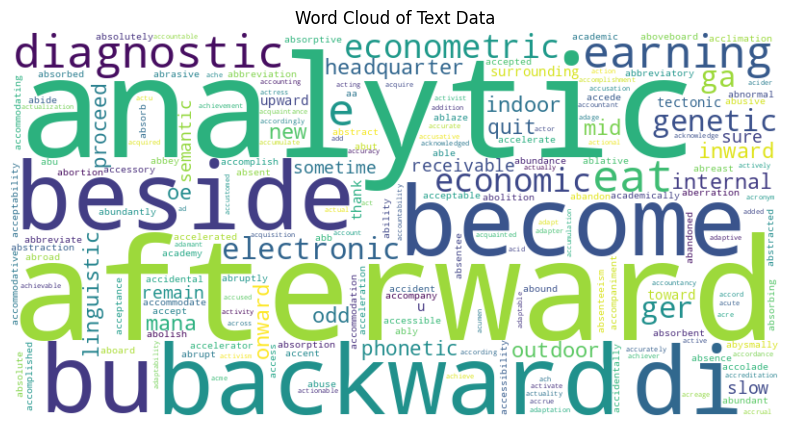

In [ ]:
from wordcloud import WordCloud

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_string)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Text Data")
plt.show()


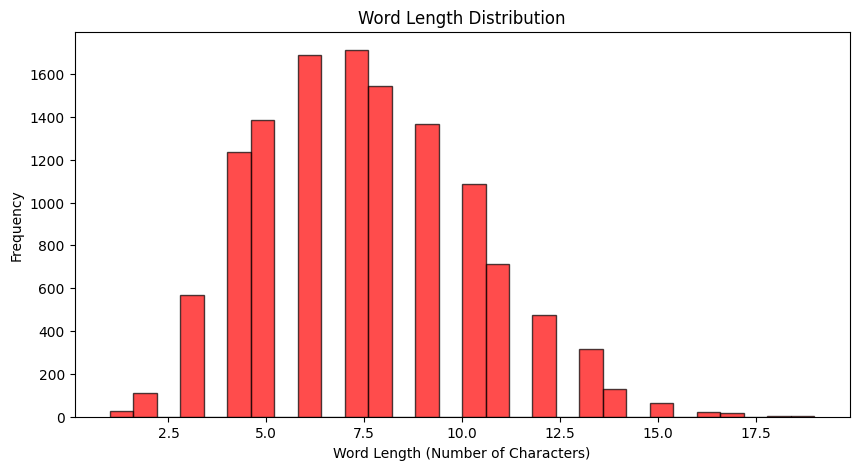

In [ ]:
# Word Length Distribution
word_lengths = [len(word) for word in word_list]

plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=30, edgecolor='black', alpha=0.7, color='red')
plt.xlabel("Word Length (Number of Characters)")
plt.ylabel("Frequency")
plt.title("Word Length Distribution")
plt.show()


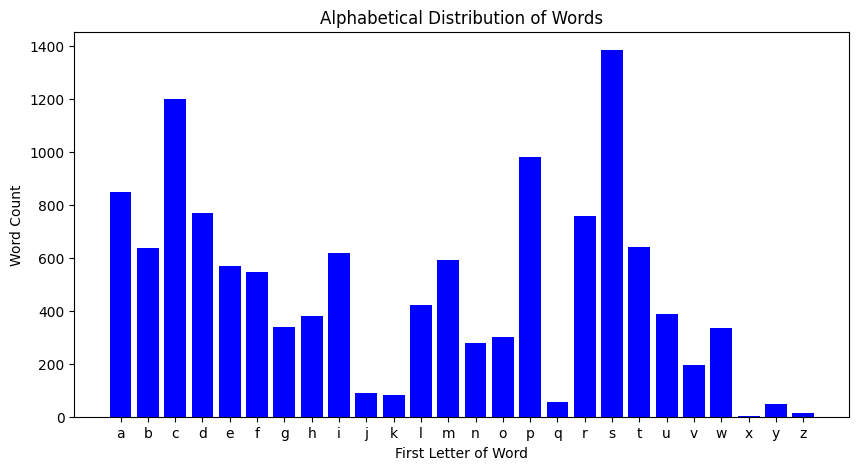

In [ ]:
import string

# Count words starting with each letter
letter_counts = Counter(word[0].lower() for word in word_list if word[0].isalpha())

# Sort by alphabet order
letters, counts = zip(*sorted(letter_counts.items()))

# Plot
plt.figure(figsize=(10, 5))
plt.bar(letters, counts, color="blue")
plt.xlabel("First Letter of Word")
plt.ylabel("Word Count")
plt.title("Alphabetical Distribution of Words")
plt.show()


# **Main**

In [ ]:
class BusinessSpellChecker:
    def __init__(self, vocabulary_path: str):
        """Initialize spell checker with business vocabulary."""
        with open(vocabulary_path, 'r', encoding='utf-8') as file:
            vocabulary = file.read().splitlines()
        self.vocabulary = set(word.lower() for word in vocabulary if word.strip())
        self.word_bigrams = {word: self._get_bigrams(word) for word in self.vocabulary}

    def _get_bigrams(self, word: str) -> set:
        """Generate character bigrams from word."""
        return {word[i:i + 2] for i in range(len(word) - 1)}

    def pos_tag_text(self, text: str) -> List[Tuple[str, str]]:
        """Perform POS tagging on the given text."""
        tokens = word_tokenize(text)
        return pos_tag(tokens)

    def _levenshtein_distance(self, s1: str, s2: str) -> int:
        """Calculate the Levenshtein distance between two strings."""
        if len(s1) < len(s2):
            return self._levenshtein_distance(s2, s1)
        if len(s2) == 0:
            return len(s1)
        previous_row = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            current_row = [i + 1]
            for j, c2 in enumerate(s2):
                insertions = previous_row[j + 1] + 1
                deletions = current_row[j] + 1
                substitutions = previous_row[j] + (c1 != c2)
                current_row.append(min(insertions, deletions, substitutions))
            previous_row = current_row
        return previous_row[-1]

    def _bigram_similarity(self, word1: str, word2: str) -> float:
        """Calculate bigram-based similarity between two words."""
        bigrams1 = self._get_bigrams(word1)
        bigrams2 = self._get_bigrams(word2)
        if not bigrams1 or not bigrams2:
            return 0.0
        intersection = len(bigrams1.intersection(bigrams2))
        union = len(bigrams1.union(bigrams2))
        return intersection / union if union > 0 else 0.0

    def _get_word_length_similarity(self, len1: int, len2: int) -> float:
        """Calculate length-based similarity score."""
        max_len = max(len1, len2)
        length_diff = abs(len1 - len2)
        return 1 - (length_diff / max_len if max_len > 0 else 0)

    def _get_prefix_similarity(self, word1: str, word2: str, prefix_length: int = 3) -> float:
        """Calculate similarity based on common prefix."""
        min_length = min(len(word1), len(word2), prefix_length)
        if min_length == 0:
            return 0.0
        prefix1 = word1[:min_length]
        prefix2 = word2[:min_length]
        matching_chars = sum(1 for c1, c2 in zip(prefix1, prefix2) if c1 == c2)
        return matching_chars / min_length

    def find_best_match(self, word: str, max_suggestions: int = 5) -> List[Tuple[str, float]]:
        """Find the best matching words from vocabulary."""
        word = word.lower()
        if word in self.vocabulary:
            return [(word, 1.0)]
        candidates = []
        word_bigrams = self._get_bigrams(word)
        length_filtered = [
            w for w in self.vocabulary
            if abs(len(w) - len(word)) <= min(3, max(2, len(word) // 3))
        ]
        first_letter_matches = [w for w in length_filtered if w[0] == word[0]]
        search_space = first_letter_matches if len(first_letter_matches) >= 3 else length_filtered
        for candidate in search_space:
            edit_distance = self._levenshtein_distance(word, candidate)
            edit_similarity = 1 - (edit_distance / max(len(word), len(candidate)))
            bigram_sim = self._bigram_similarity(word, candidate)
            length_sim = self._get_word_length_similarity(len(word), len(candidate))
            prefix_sim = self._get_prefix_similarity(word, candidate)
            total_similarity = (
                    edit_similarity * 0.45 +
                    bigram_sim * 0.25 +
                    prefix_sim * 0.20 +
                    length_sim * 0.10
            )
            candidates.append((candidate, total_similarity))
        return sorted(candidates, key=lambda x: x[1], reverse=True)[:max_suggestions]

    def correct_text(self, text: str, confidence_threshold: float = 0.6) -> Dict[str, List[Tuple[str, float]]]:
        words = re.findall(r'\b\w+\b', text.lower())
        corrections = {}
        for word in words:
            if word not in self.vocabulary:
                suggestions = self.find_best_match(word)
                valid_suggestions = [
                    (sugg, conf) for sugg, conf in suggestions if conf >= confidence_threshold
                ]
                if valid_suggestions:
                    corrections[word] = valid_suggestions
        return corrections

In [ ]:
spell_checker = BusinessSpellChecker("/content/preprocessed_dataset.txt") # or your vocabulary file path

# Test the spell checker
test_text = "Busines anlyssis and financal management is impotant fo succes in any organiztion."
print("Sample sentence:")
print(test_text)
corrections = spell_checker.correct_text(test_text)

# Print Corrections
print("\nCorrections:")
for word, suggestions in corrections.items():
    print(f"{word} -> {suggestions}")

# Generate Corrected Sentence
words = re.findall(r'\b\w+\b', test_text)  # Extract only words, removing punctuation
corrected_words = []

for word in words:
    if len(word) <= 1:
        corrected_words.append(word)  # Keep words with 3 or fewer letters unchanged
    else:
        lower_word = word.lower()
        if lower_word in corrections:
            best_match, confidence = corrections[lower_word][0]  # Get the best match and confidence
            if confidence >= 0.60:
                corrected_words.append(best_match.rstrip('.:?!'))  # Remove trailing punctuation from suggestions
            else:
                corrected_words.append(word)  # Keep the original word if confidence is lower
        else:
            corrected_words.append(word)

corrected_sentence = " ".join(corrected_words)
corrected_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', corrected_sentence)  # Remove all symbols
corrected_sentence = corrected_sentence.strip() # Ensure sentence ends with a period

# POS Tagging
word_tags = spell_checker.pos_tag_text(corrected_sentence)
print("\nPart of Speech Tags:")
for word, tag in word_tags:
    print(f"{word}: {tag}")

print("\nCorrected Sentence:")
print(corrected_sentence)

Sample sentence:
Busines anlyssis and financal management is impotant fo succes in any organiztion.

Corrections:
busines -> [('business', 0.8955357142857142), ('besides', 0.6103174603174603)]
anlyssis -> [('analysis', 0.7097222222222223)]
financal -> [('financial', 0.8555555555555555), ('finance', 0.7812500000000001), ('financier', 0.7138888888888889), ('finally', 0.6236111111111112), ('fanatical', 0.6131313131313132)]
impotant -> [('important', 0.8555555555555555), ('implant', 0.7361111111111112), ('importance', 0.7086363636363637), ('impatient', 0.6513888888888889), ('imposing', 0.6494318181818182)]
fo -> [('fox', 0.6916666666666667), ('fob', 0.6916666666666667), ('fog', 0.6916666666666667), ('for', 0.6916666666666667), ('foe', 0.6916666666666667)]
succes -> [('success', 0.8797619047619049), ('succeed', 0.7500000000000001), ('suchness', 0.6395833333333334)]
organiztion -> [('organization', 0.8916666666666667), ('organizational', 0.7928571428571429), ('organize', 0.6954545454545455),

-----------------------------------------

# **Grammar checker**

In [ ]:
!pip install language_tool_python
import language_tool_python

def correct_grammar(text):
    tool = language_tool_python.LanguageTool('en-US')
    matches = tool.check(text)
    corrected_text = language_tool_python.utils.correct(text, matches)
    return corrected_text

# Example usage
text = "\nShe love perfumee and body care and also she like things like Julie is a girly stuff."
corrected = correct_grammar(text)
print(corrected)

INFO:language_tool_python.download_lt:Unzipping /tmp/tmpl_d8158c.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.



She loves perfume and body care, and also she is like things like Julie is a girly stuff.


In [ ]:
input_text = "She loves perfume and body care. She also likes jewelry and other nice things."
corrected_text = correct_grammar(input_text)
print("Corrected Text:", corrected_text)


Corrected Text: She loves perfume and body care. She also likes jewelry and other nice things.


# **GUI**

To access the GUI directly, first import all necessary libraries in a single cell labeled "Import Library." Then, proceed by executing each subsequent cell in order, ensuring proper initialization and setup.

Additionally, you must add the dataset that contains preprocessed_dataset, which was generated during preprocessing from dataset_text before running the GUI.

In [ ]:
import gradio as gr
import re
from typing import List, Tuple, Dict
import language_tool_python
import nltk

# Download required NLTK data (quietly)
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

ModuleNotFoundError: No module named 'language_tool_python'

In [ ]:
import re
from typing import List, Tuple, Dict
import language_tool_python
import gradio as gr

class BusinessSpellChecker:
    def __init__(self, vocabulary_path: str):
        """Initialize spell checker with business vocabulary."""
        with open(vocabulary_path, 'r', encoding='utf-8') as file:
            vocabulary = file.read().splitlines()
        self.vocabulary = set(word.lower() for word in vocabulary if word.strip())
        self.word_bigrams = {word: self._get_bigrams(word) for word in self.vocabulary}

    def _get_bigrams(self, word: str) -> set:
        """Generate character bigrams from word."""
        return {word[i:i + 2] for i in range(len(word) - 1)}

    def _levenshtein_distance(self, s1: str, s2: str) -> int:
        """Calculate the Levenshtein distance between two strings."""
        if len(s1) < len(s2):
            return self._levenshtein_distance(s2, s1)
        if len(s2) == 0:
            return len(s1)
        previous_row = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            current_row = [i + 1]
            for j, c2 in enumerate(s2):
                insertions = previous_row[j + 1] + 1
                deletions = current_row[j] + 1
                substitutions = previous_row[j] + (c1 != c2)
                current_row.append(min(insertions, deletions, substitutions))
            previous_row = current_row
        return previous_row[-1]

    def _bigram_similarity(self, word1: str, word2: str) -> float:
        """Calculate bigram-based similarity between two words."""
        bigrams1 = self._get_bigrams(word1)
        bigrams2 = self._get_bigrams(word2)
        if not bigrams1 or not bigrams2:
            return 0.0
        intersection = len(bigrams1.intersection(bigrams2))
        union = len(bigrams1.union(bigrams2))
        return intersection / union if union > 0 else 0.0

    def _get_word_length_similarity(self, len1: int, len2: int) -> float:
        """Calculate length-based similarity score."""
        max_len = max(len1, len2)
        length_diff = abs(len1 - len2)
        return 1 - (length_diff / max_len if max_len > 0 else 0)

    def _get_prefix_similarity(self, word1: str, word2: str, prefix_length: int = 3) -> float:
        """Calculate similarity based on common prefix."""
        min_length = min(len(word1), len(word2), prefix_length)
        if min_length == 0:
            return 0.0
        prefix1 = word1[:min_length]
        prefix2 = word2[:min_length]
        matching_chars = sum(1 for c1, c2 in zip(prefix1, prefix2) if c1 == c2)
        return matching_chars / min_length

    def find_best_match(self, word: str, max_suggestions: int = 5) -> List[Tuple[str, float]]:
        """Find the best matching words from vocabulary."""
        word = word.lower()
        if word in self.vocabulary:
            return [(word, 1.0)]
        candidates = []
        length_filtered = [
            w for w in self.vocabulary
            if abs(len(w) - len(word)) <= min(3, max(2, len(word) // 3))
        ]
        first_letter_matches = [w for w in length_filtered if w[0] == word[0]]
        search_space = first_letter_matches if len(first_letter_matches) >= 3 else length_filtered
        for candidate in search_space:
            edit_distance = self._levenshtein_distance(word, candidate)
            edit_similarity = 1 - (edit_distance / max(len(word), len(candidate)))
            bigram_sim = self._bigram_similarity(word, candidate)
            length_sim = self._get_word_length_similarity(len(word), len(candidate))
            prefix_sim = self._get_prefix_similarity(word, candidate)
            total_similarity = (
                edit_similarity * 0.45 +
                bigram_sim * 0.25 +
                prefix_sim * 0.20 +
                length_sim * 0.10
            )
            candidates.append((candidate, total_similarity))
        return sorted(candidates, key=lambda x: x[1], reverse=True)[:max_suggestions]

    def correct_text(self, text: str, confidence_threshold: float = 0.6) -> Dict[str, List[Tuple[str, float]]]:
        """
        Correct spelling in the provided text.
        Returns a dictionary mapping each misspelled word to a list of (suggestion, score) tuples.
        """
        words = re.findall(r'\b\w+\b', text.lower())
        corrections = {}
        for word in words:
            if word not in self.vocabulary:
                suggestions = self.find_best_match(word)
                valid_suggestions = [
                    (sugg, conf) for sugg, conf in suggestions if conf >= confidence_threshold
                ]
                if valid_suggestions:
                    corrections[word] = valid_suggestions
        return corrections

    def correct_grammar(self, text: str) -> Tuple[List[language_tool_python.Match], str]:
        """
        Use language_tool_python to correct grammar in the given text.
        Returns a tuple (matches, corrected_text).
        """
        tool = language_tool_python.LanguageTool('en-US')
        matches = tool.check(text)
        corrected_text = language_tool_python.utils.correct(text, matches)
        return matches, corrected_text

    def correct_spelling_and_grammar(self, text: str, confidence_threshold: float = 0.6) -> Dict[str, any]:
        """
        Corrects spelling first and then grammar.
        Returns a dictionary with spelling corrections, grammar matches, and the fully corrected text.
        """
        corrections = self.correct_text(text, confidence_threshold=confidence_threshold)
        corrected_text = text
        # Replace each misspelled word with the best suggestion.
        for word, suggestions in corrections.items():
            best_suggestion = suggestions[0][0]
            corrected_text = re.sub(rf"\b{word}\b", best_suggestion, corrected_text, flags=re.IGNORECASE)
        tool = language_tool_python.LanguageTool('en-US')
        grammar_matches = tool.check(corrected_text)
        grammar_corrected_text = language_tool_python.utils.correct(corrected_text, grammar_matches)
        return {
            "spelling_corrections": corrections,
            "grammar_matches": grammar_matches,
            "grammar_corrected_text": grammar_corrected_text
        }
 #--------------------------------------------------------------------------------------------------------------------------

class SpellCheckerGUI:
    def __init__(self, vocabulary_path):
        self.spell_checker = BusinessSpellChecker(vocabulary_path)
        self.grammar_tool = language_tool_python.LanguageTool('en-US')
        self.demo = gr.Blocks()
        self.selected_word = None
        self.last_text = ""         # Stores the last corrected text for manual review.
        self.last_corrections = {}  # Stores the corrections from the last check.
        self._build_ui()

    def check_spelling(self, text):
        """
        Checks spelling, automatically corrects misspelled words using the best suggestions,
        and populates the dropdown with the misspelled words for manual adjustments.
        """
        if len(text) > 500:
            return "Error: Text exceeds 500 characters.", gr.update(choices=[], value=None)

        corrections = self.spell_checker.correct_text(text)
        corrected_text = text
        for word, suggestions in corrections.items():
            best_suggestion = suggestions[0][0]
            corrected_text = re.sub(rf"\b{word}\b", best_suggestion, corrected_text, flags=re.IGNORECASE)

        self.last_text = corrected_text
        self.last_corrections = corrections

        misspelled_words = list(corrections.keys())
        return corrected_text, gr.update(choices=misspelled_words, value=None)

    def check_grammar(self, text):
        """
        Checks and corrects grammar in the input text without modifying the spelling.
        """
        if len(text) > 500:
            return "Error: Text exceeds 500 characters."
        matches = self.grammar_tool.check(text)
        grammar_corrected_text = language_tool_python.utils.correct(text, matches)
        return grammar_corrected_text

    def select_word(self, word):
        """
        Retrieves spelling suggestions for the selected misspelled word.
        The original misspelled word is included as the first option.
        This function only updates the suggestions dropdown without changing the corrected sentence.
        """
        if not word:
            return gr.update(choices=[], value=None), self.last_text
        self.selected_word = word
        suggestions = self.spell_checker.find_best_match(word, max_suggestions=5)
        suggestion_list = [word] + [s[0] for s in suggestions if s[0] != word]
        return gr.update(choices=suggestion_list, value=None), self.last_text

    def apply_correction(self, text, selected_word, chosen_suggestion):
        """
        Applies the selected correction to the text.
        This function replaces only the first occurrence of the auto-corrected word that
        corresponds to the originally misspelled 'selected_word' with the 'chosen_suggestion'.
        """
        if not selected_word or not chosen_suggestion:
            return text  # No changes if nothing is selected.

        # Retrieve the auto-applied correction from the last corrections mapping.
        auto_correction = self.last_corrections.get(selected_word, [(selected_word, 1.0)])[0][0]
        pattern = rf"\b{re.escape(auto_correction)}\b"
        if re.search(pattern, text, flags=re.IGNORECASE):
            corrected_text = re.sub(pattern, chosen_suggestion, text, count=1, flags=re.IGNORECASE)
        else:
            # Fallback: if auto correction is not found in text, try replacing the original selected word.
            pattern = rf"\b{re.escape(selected_word)}\b"
            corrected_text = re.sub(pattern, chosen_suggestion, text, count=1, flags=re.IGNORECASE)
        self.last_text = corrected_text
        return corrected_text

    def correct_all(self, text):
        """
        Corrects both spelling and grammar at once.
        """
        result = self.spell_checker.correct_spelling_and_grammar(text)
        self.last_text = result["grammar_corrected_text"]
        return result["grammar_corrected_text"]

    def clear_inputs(self):
        """
        Clears all input fields and resets dropdowns.
        """
        self.last_text = ""
        self.last_corrections = {}
        return "", "", gr.update(choices=[], value=None), gr.update(choices=[], value=None)

    def _build_ui(self):
        with self.demo:
            # Adding custom CSS for enhanced GUI appearance.
            gr.HTML(
                """
                <style>
                .title {
                    font-family: 'Arial', sans-serif;
                    color: #2c3e50;
                    text-align: center;
                    font-size: 28px;
                    margin-top: 20px;
                    margin-bottom: 10px;
                }
                .subtitle {
                    font-family: 'Arial', sans-serif;
                    color: #34495e;
                    text-align: center;
                    font-size: 18px;
                    margin-bottom: 20px;
                }
                .instruction {
                    font-family: 'Arial', sans-serif;
                    color: #7f8c8d;
                    text-align: center;
                    margin-bottom: 20px;
                }
                </style>
                """
            )
            gr.Markdown("<div class='title'>📝 Spelling & Grammar Correction System</div>")
            gr.Markdown("<div class='subtitle'>Enter text (max 500 characters) below:</div>")
            self.input_text = gr.Textbox(label="Your Text", lines=4, max_length=500, placeholder="Type your sentence here...")

            with gr.Row():
                self.check_spelling_button = gr.Button("Check Spelling", variant="primary")
                self.check_grammar_button = gr.Button("Check Grammar", variant="primary")
                self.correct_all_button = gr.Button("Correct All", variant="primary")
                self.clear_button = gr.Button("Clear", variant="secondary")

            self.output_corrected = gr.Textbox(label="Corrected Sentence", lines=3, interactive=True)

            gr.Markdown("<div class='subtitle'>Manual Corrections</div>")
            gr.Markdown("<div class='instruction'>Select a misspelled word and choose a suggestion. Then click 'Apply Correction' to update the sentence.</div>")
            with gr.Row():
                self.misspelled_word_dropdown = gr.Dropdown(label="Select Misspelled Word", choices=[], interactive=True)
                self.select_word_button = gr.Button("Load Suggestions")
            self.suggestions_dropdown = gr.Dropdown(label="Suggested Corrections", choices=[], interactive=True)
            self.apply_correction_button = gr.Button("Apply Correction", variant="secondary")

            # Define actions for buttons.
            self.check_spelling_button.click(
                self.check_spelling,
                inputs=[self.input_text],
                outputs=[self.output_corrected, self.misspelled_word_dropdown]
            )
            self.check_grammar_button.click(
                self.check_grammar,
                inputs=[self.input_text],
                outputs=self.output_corrected
            )
            self.select_word_button.click(
                self.select_word,
                inputs=[self.misspelled_word_dropdown],
                outputs=[self.suggestions_dropdown, self.output_corrected]
            )
            self.apply_correction_button.click(
                self.apply_correction,
                inputs=[self.output_corrected, self.misspelled_word_dropdown, self.suggestions_dropdown],
                outputs=[self.output_corrected]
            )
            self.correct_all_button.click(
                self.correct_all,
                inputs=[self.input_text],
                outputs=[self.output_corrected]
            )
            self.clear_button.click(
                self.clear_inputs,
                inputs=[],
                outputs=[self.input_text, self.output_corrected, self.misspelled_word_dropdown, self.suggestions_dropdown]
            )

    def launch(self):
        self.demo.launch()

if __name__ == "__main__":
    # Ensure the vocabulary file is available at the specified path.
    gui = SpellCheckerGUI("preprocessed_dataset.txt")
    gui.launch()


ModuleNotFoundError: No module named 'language_tool_python'